# Detecting the persons with heart desease

### Loading the libraries

In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier
np.random.seed(0)

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


### Creating classifier

In [4]:
clf_rf = RandomForestClassifier(10, max_depth=5)

In [9]:
X = data.drop('target', axis=1)
y = data.target

Searching for best parameters:

In [10]:
grid_search_cv_clf.fit(X, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [2, 5, 7, 10, 12],
                         'min_samples_leaf': [2, 8, 5, 10, 15, 20, 30, 40, 50,
                                              60],
                         'n_estimators': [5, 10, 20, 30, 40, 50]})

In [11]:
grid_search_cv_clf.best_params_

{'max_depth': 5, 'min_samples_leaf': 30, 'n_estimators': 30}

In [12]:
best_clf = grid_search_cv_clf.best_estimator_

### Checking score and defining feature importance:

In [13]:
best_clf.score(X, y)

0.8481848184818482

In [14]:
feature_importances = best_clf.feature_importances_

In [16]:
feature_importances_df = pd.DataFrame({'features': list(X), 'feature_importances': feature_importances})

In [21]:
features_sorted = feature_importances_df.sort_values('feature_importances', ascending=False)

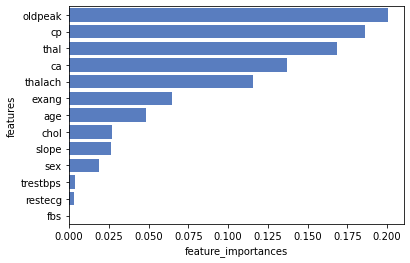

In [22]:
sns.set_color_codes("muted")
sns.barplot(x="feature_importances", y="features", data=features_sorted,
            label="importance", color="b")